# A simple notebook to browse the CIFAR-10.1 dataset

The following cell contains setup code.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import os
import random
import sys

repo_root = os.path.join(os.getcwd(), '../code')
sys.path.append(repo_root)

from IPython.display import display
from ipywidgets import Layout
from ipywidgets import widgets
from matplotlib import pyplot as plt
import numpy as np
import tqdm

import utils

cifar_label_names = utils.cifar10_label_names

# Loading the dataset

There are two versions of the CIFAR-10.1 dataset:
- `v6` is the recommended dataset for future experiments and corresponds to the results in Appendix D of our paper.
- `v4` is the first version of our dataset. The numbers reported in the main section of our paper use this dataset.

Passing the respective string to `utils.load_new_test_data` loads the corresponding version of our dataset.

The loading code in `utils.py` is simple and mainly consists of two calls two `np.load`.

In [3]:
version = 'v4'
images, labels = utils.load_new_test_data(version)
num_images = images.shape[0]

print('\nLoaded version "{}" of the CIFAR-10.1 dataset.'.format(version))
print('There are {} images in the dataset.'.format(num_images))


Loaded version "v4" of the CIFAR-10.1 dataset.
There are 2021 images in the dataset.


# Browse the new dataset

Execute the following cell to browse the images in the dataset.

By default, the cell shows the first 400 images. You can change which 400 images to show by setting `image_offset` at the beginning of the cell appropriately.

In [5]:
# Set this to determine which image to start with
image_offset = 0

num_images_to_show = min(len(labels) - image_offset, 400)
num_cols = 8
num_rows = 13
num_per_tab = num_cols * num_rows
num_tabs = int(math.ceil(num_images_to_show / num_per_tab))
scale = 3

tab_contents = []
for kk in tqdm.tqdm(range(num_tabs), desc='Setting up image tabs'):
    rows = []
    cur_num_rows = num_rows
    if kk == num_tabs - 1:
        cur_num_rows = int(math.ceil((num_images_to_show - (num_tabs - 1) * num_per_tab) / num_cols))
    for ii in range(cur_num_rows):
        cur_row = []
        cur_num_cols = num_cols
        if kk == num_tabs - 1 and ii == cur_num_rows - 1:
            cur_num_cols = num_images_to_show - (num_tabs - 1) * num_per_tab - (cur_num_rows - 1) * num_cols
        for jj in range(cur_num_cols):
            cur_index = kk * num_per_tab + ii * num_cols + jj
            cur_img = widgets.Image(value=utils.np_to_png(images[cur_index + image_offset,:,:,:], scale=scale))
            cur_class = labels[cur_index + image_offset]
            cur_label = widgets.Label(value=cifar_label_names[cur_class] + '  (' + str(cur_index + image_offset) + ')')
            cur_box = widgets.VBox([cur_img, cur_label])
            cur_box.layout.align_items = 'center'
            cur_box.layout.padding = '6px'
            cur_row.append(cur_box)
        cur_hbox = widgets.HBox(cur_row)
        rows.append(cur_hbox)
    tab_contents.append(widgets.VBox(rows))

tab = widgets.Tab()
tab.children = tab_contents
for i in range(len(tab.children)):
    tab.set_title(i, str(i))
display(tab)

Setting up image tabs: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


# Look at the image for a given index

When working with the CIFAR-10.1 dataset, the following code snippet might be useful.
It simply shows the image and class for a given index (and we use a random index as a default here).

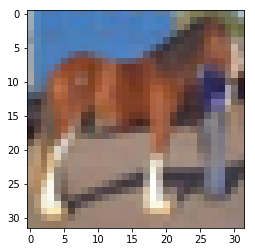

Class "horse"


In [6]:
image_index = random.randrange(num_images)
plt.figure()
plt.imshow(images[image_index,:,:,:])
plt.show()

print('Class "{}"'.format(cifar_label_names[labels[image_index]]))